In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CarPrice_Assignment.csv')
data_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
print(data_df.shape)
print(data_df.columns)

(205, 26)
Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [5]:
data_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
data_df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_df['fueltype'] = le.fit_transform(data_df['fueltype'])
data_df['aspiration'] = le.fit_transform(data_df['aspiration'])
data_df['carbody'] = le.fit_transform(data_df['carbody'])
data_df['drivewheel'] = le.fit_transform(data_df['drivewheel'])
data_df['enginelocation'] = le.fit_transform(data_df['enginelocation'])
data_df['fuelsystem'] = le.fit_transform(data_df['fuelsystem'])

In [8]:
data_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,two,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,two,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,two,2,2,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,four,3,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,four,3,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,0,four,3,2,0,109.1,188.8,68.9,55.5,2952,ohc,four,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,1,four,3,2,0,109.1,188.8,68.8,55.5,3049,ohc,four,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,0,four,3,2,0,109.1,188.8,68.9,55.5,3012,ohcv,six,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,1,four,3,2,0,109.1,188.8,68.9,55.5,3217,ohc,six,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [9]:
data_df['doornumber'] = data_df['doornumber'].replace({'two':2, 'four':4})
data_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
data_df.corr()['price']

car_ID             -0.109093
symboling          -0.079978
fueltype           -0.105679
aspiration          0.177926
doornumber          0.031835
carbody            -0.083976
drivewheel          0.577992
enginelocation      0.324973
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
fuelsystem          0.526823
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [11]:
data_df2 = data_df[['drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
                    'enginesize', 'boreratio', 'horsepower', 'price']]

In [12]:
data_df2.shape

(205, 10)

In [13]:
data_df2.head()

,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
0,2,0,88.6,168.8,64.1,2548,130,3.47,111,13495.0
1,2,0,88.6,168.8,64.1,2548,130,3.47,111,16500.0
2,2,0,94.5,171.2,65.5,2823,152,2.68,154,16500.0
3,1,0,99.8,176.6,66.2,2337,109,3.19,102,13950.0
4,0,0,99.4,176.6,66.4,2824,136,3.19,115,17450.0


In [14]:
x = (data_df2.iloc[:, :9])
y = (data_df2.iloc[:, 9])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [15]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(9,)))
  model.add(layers.Dense(10, activation='relu'))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(6, activation='relu'))
  model.add(layers.Dense(1, activation='relu'))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [16]:
model = build_model()

In [18]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.287)

Epoch 1/100
4/4 [==============================] - 1s 96ms/step - loss: 209050073.6000 - mae: 12445.8213 - val_loss: 309666240.0000 - val_mae: 14970.9883
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 195389520.0000 - mae: 12208.1490 - val_loss: 309666240.0000 - val_mae: 14970.9883
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 218567187.2000 - mae: 13077.4068 - val_loss: 309666240.0000 - val_mae: 14970.9883
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 212980540.8000 - mae: 12803.7338 - val_loss: 309666240.0000 - val_mae: 14970.9883
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 217821846.4000 - mae: 12875.3682 - val_loss: 309666240.0000 - val_mae: 14970.9883
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 206699811.2000 - mae: 12684.6484 - val_loss: 309666240.0000 - val_mae: 14970.9883
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 2020

In [19]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 237576256.0000 - mae: 12972.7373


[237576256.0, 12972.7373046875]

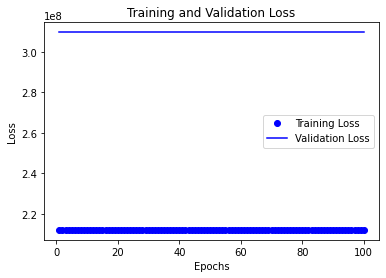

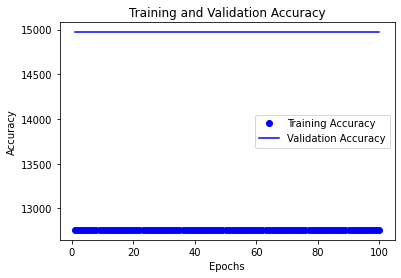

In [21]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
plt.plot(epochs, mae_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_mae_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
y_pred = model.predict(x_test)

In [24]:
y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)